In [ ]:
import pickle
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from copy import deepcopy

new_map = {'1, 1000': "#e8de6b",
         '1, 10000': "#e8b66b",
         '1, 50000': "#e8976b",
         '1, 100000': "#e87b6b",
         '2, 1000': "#6fff5c",
         '2, 10000': "#4ef5aa",
         '2, 50000': "#4ee1f5",
         '2, 100000': "#4e6ff5",
#          '4, 50000': "#864ef5",
#          '4, 70000': "#bb4ef5",
#          '4, 1000000': "#ed5cdf",
          }

files = ['../../../data/out_metrics/results_20250121_174325_paramsize_0_24.pkl',
         '../../../data/out_metrics/results_20250122_043534_paramsize_24_32.pkl',
        ]

In [12]:
all_results

{(1000,
  'softmax',
  1,
  16): [[0.0,
   0.1,
   1.2,
   5.1,
   8.4,
   9.0,
   9.5,
   9.6,
   9.5,
   9.6,
   9.5,
   9.5,
   10.4,
   10.4,
   11.4,
   11.5,
   12.0,
   11.9,
   11.8,
   12.4,
   12.8,
   12.8,
   12.9,
   13.1,
   13.1,
   12.9,
   13.5,
   13.5,
   14.6,
   14.0,
   14.5,
   14.8,
   14.9,
   15.6,
   16.1,
   16.7,
   17.6,
   17.4,
   19.2,
   19.4,
   20.2,
   20.4,
   21.3,
   21.8,
   23.3,
   23.9,
   25.1,
   26.5,
   28.1,
   29.1,
   31.4,
   33.4,
   35.5,
   36.9,
   39.0,
   40.6,
   43.5,
   46.2,
   48.6,
   50.9,
   53.9,
   57.6,
   60.4,
   62.4,
   66.0,
   67.9,
   69.9,
   73.3,
   75.6,
   77.3,
   80.7,
   81.3,
   83.5,
   85.9,
   87.3,
   88.1,
   89.5,
   91.2,
   92.7,
   93.7,
   94.1,
   94.8,
   95.1,
   95.4,
   95.9,
   96.3,
   96.7,
   97.2,
   97.5,
   97.5,
   97.8,
   98.2,
   98.1,
   98.6,
   98.5,
   98.6,
   98.6,
   98.7,
   98.9,
   99.0,
   98.9,
   99.0,
   99.2,
   99.5,
   99.3,
   99.6,
   99.6,
   99.4,
   99.5,

In [13]:
all_results = dict()
for file_name in files:
    with open(file_name, "rb") as file:
        results = dict(pickle.load(file))
    all_results = {**all_results, **results}
    
print(f"Amount of sets: {len(all_results)}")

# Flatten the data while preserving the structure from the tuple keys
flattened_data = {
    "activation_function": [],
    "num_layers": [],
    "n_rows": [],
    "d_model": [],
    "iteration": [],
    "epochs": [],
    "accuracy": [],
    "capacity": []
}

# Iterate over each dataset size, activation function, and number of layers
for (n_rows, act_fn, n_layers, d_model), list_of_iterations in all_results.items():
    # For each iteration in the dataset size
    for i, iteration_list in enumerate(list_of_iterations):
        # Flatten the iteration list with epochs multiplied by 2 (0, 2, 4, ..., 18)
        for epoch, value in enumerate(iteration_list):
            cur_act_fn = act_fn
            if act_fn == 'default':
                cur_act_fn = "default"
            flattened_data["activation_function"].append(cur_act_fn)
            flattened_data["num_layers"].append(n_layers)
            flattened_data["n_rows"].append(n_rows)
            flattened_data["d_model"].append(d_model)
            flattened_data["iteration"].append(i)
            flattened_data["epochs"].append((epoch+1) * 2)
            flattened_data["accuracy"].append(value)
            flattened_data["capacity"].append(int(value/100*n_rows))

# Convert to DataFrame for plotting
results_melted = pd.DataFrame(flattened_data)
results_melted.activation_function = results_melted.activation_function.apply(lambda x: {'default': "ReLU", 'GELU':'GELU', 'RAF':"RReLU", 'softmax':'softmax'}[x])
results_melted
# pd.DataFrame(all_results).T

Amount of sets: 32


,activation_function,num_layers,n_rows,d_model,iteration,epochs,accuracy,capacity
0,softmax,1,1000,16,0,2,0.000,0
1,softmax,1,1000,16,0,4,0.100,1
2,softmax,1,1000,16,0,6,1.200,12
3,softmax,1,1000,16,0,8,5.100,51
4,softmax,1,1000,16,0,10,8.400,84
...,...,...,...,...,...,...,...,...
23995,softmax,2,100000,128,2,492,88.283,88283
23996,softmax,2,100000,128,2,494,88.247,88247
23997,softmax,2,100000,128,2,496,88.298,88298
23998,softmax,2,100000,128,2,498,88.296,88296


In [21]:
def draw_acc_epochs(
    results_melted,
    cur_cutoff,
    layer_color_map,
    x="epochs",
    y="accuracy",
    xlabel="Epochs",
    ylabel="Accuracy, %",
    title="Mean accuracy with standard deviation per epoch of training\nfor different data sizes, model size, and layers amount",
):
    cur_results_melted = results_melted[results_melted.epochs <= cur_cutoff].rename(
        columns={
            "n_rows": "data size",
            "n_rows, num_layers": "data size, layers amount",
            "d_model": "model size",
        }
    )

    # Plot with Seaborn
    sns.set(style="whitegrid")
    plt.figure(figsize=(9, 5))

    sns.lineplot(
        data=cur_results_melted,
        x=x,
        y=y,
        hue="data size, layers amount",  # Combined hue for Num_Layers and N_rows
        style="model size",
        size="model size",
        palette=layer_color_map,  # Ensure this supports the combined categories
        linewidth=1,
    )

    plt.xlim(0, cur_cutoff)

    # Add labels and legend
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.legend(title="Configuration", bbox_to_anchor=(1.05, 1), loc="upper left")

    # Show the plot
    plt.tight_layout()
    plt.show()

In [22]:
# Generate unique colors for each Num_Layers value
unique_layers = results_melted['num_layers'].unique()
layer_palette = sns.color_palette("Set2", len(unique_layers))
layer_color_map = {layer: color for layer, color in zip(unique_layers, layer_palette)}

results_melted['n_rows, num_layers'] = results_melted['num_layers'].astype(str) + ", " + results_melted['n_rows'].astype(str)  
unique_hues = sorted(results_melted['n_rows, num_layers'].unique())
layer_color_map = {hue: sns.color_palette("Paired")[i % 10] for i, hue in enumerate(unique_hues)}


30


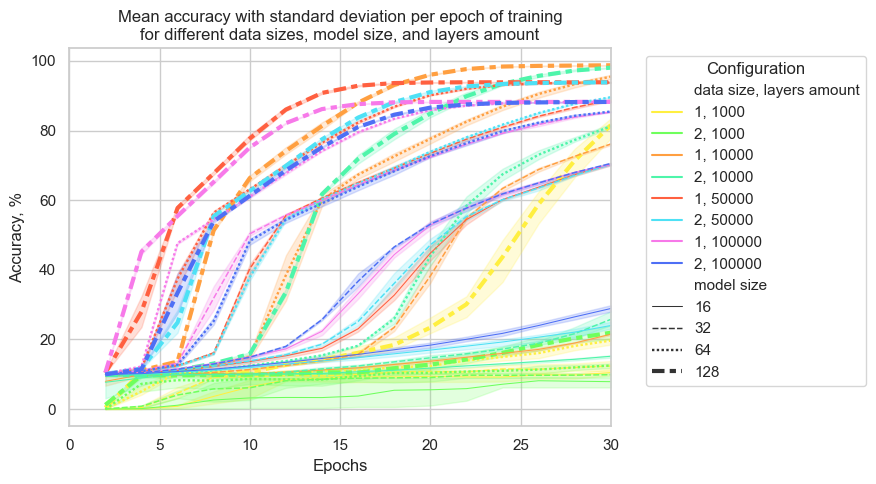

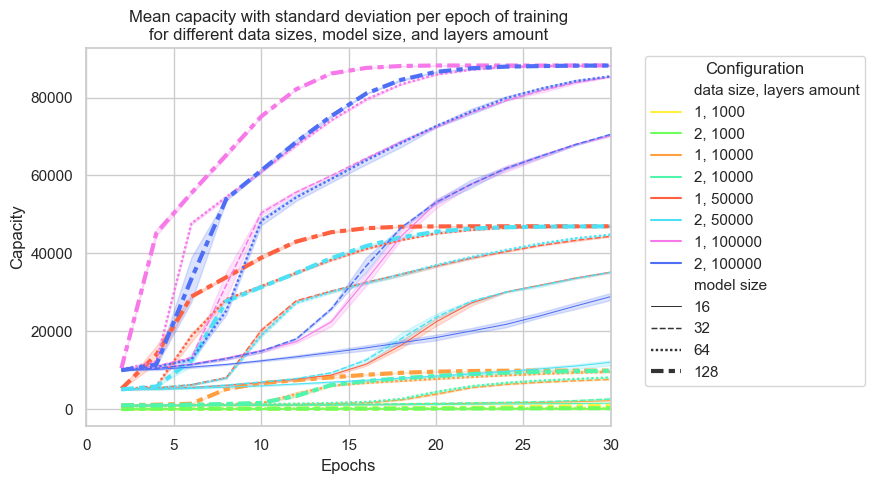

100


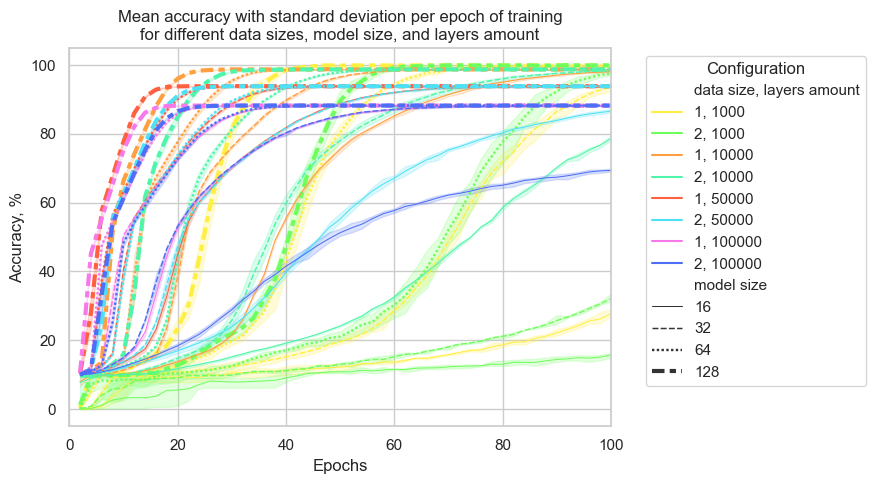

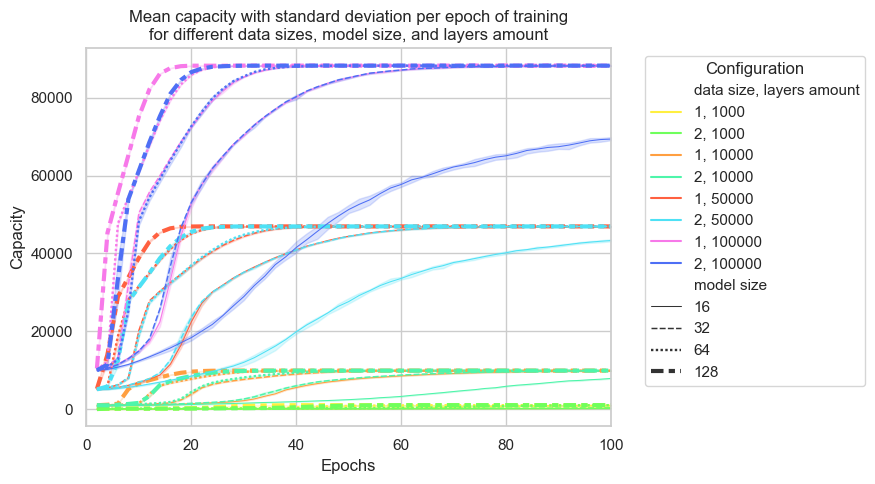

500


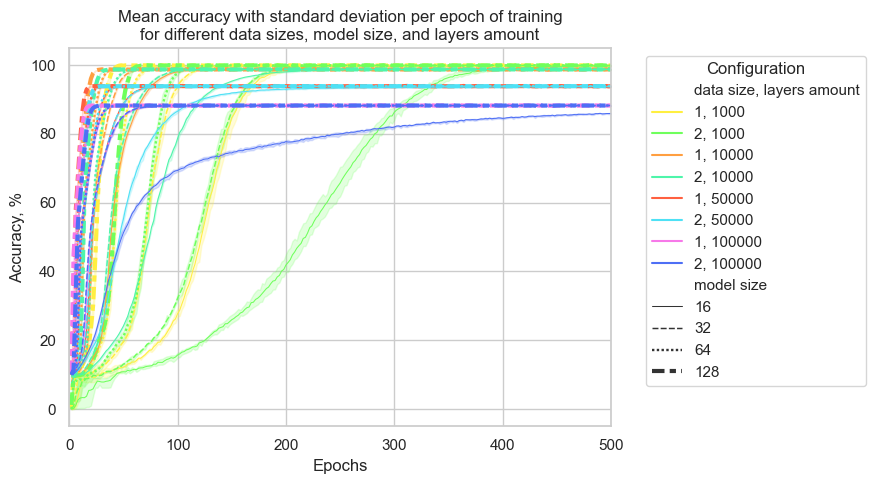

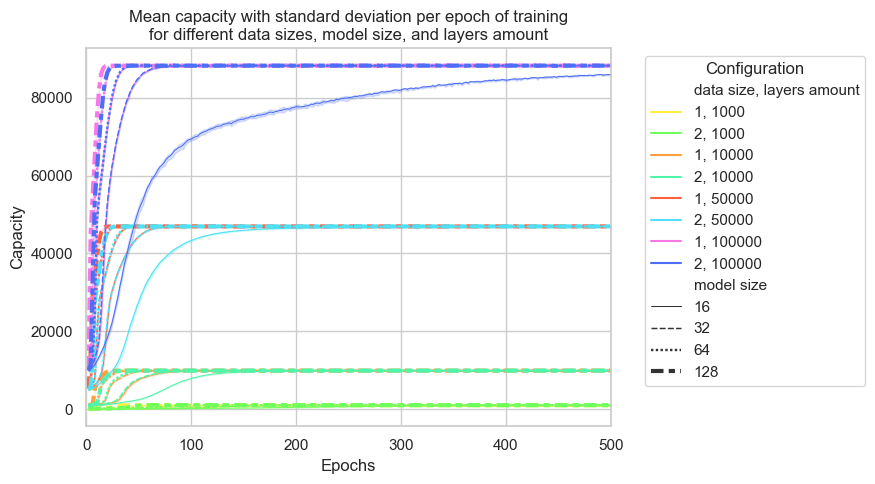

In [28]:
for epochs in [30, 100, results_melted.epochs.max()]:
    print(epochs)
    draw_acc_epochs(
        results_melted,
        epochs,
        new_map,
        x="epochs",
        y="accuracy",
        xlabel="Epochs",
        ylabel="Accuracy, %",
        title="Mean accuracy with standard deviation per epoch of training\nfor different data sizes, model size, and layers amount",
    )
    draw_acc_epochs(
        results_melted,
        epochs,
        new_map,
        x="epochs",
        y="capacity",
        xlabel="Epochs",
        ylabel="Capacity",
        title="Mean capacity with standard deviation per epoch of training\nfor different data sizes, model size, and layers amount",
    )

## Violins

In [24]:
data_viol = results_melted[results_melted.epochs == max(results_melted.epochs)]
data_viol.head()

,activation_function,num_layers,n_rows,d_model,iteration,epochs,accuracy,capacity,"n_rows, num_layers"
249,softmax,1,1000,16,0,500,100.0,1000,"1, 1000"
499,softmax,1,1000,16,1,500,100.0,1000,"1, 1000"
749,softmax,1,1000,16,2,500,99.9,999,"1, 1000"
999,softmax,1,1000,32,0,500,99.8,998,"1, 1000"
1249,softmax,1,1000,32,1,500,100.0,1000,"1, 1000"


In [25]:
temp = deepcopy(data_viol)
temp.d_model = 'all'

df = pd.concat([data_viol, temp]).set_index(['d_model','num_layers'])[['n_rows', 'accuracy', 'capacity']]
grouped = (
    df.groupby(['d_model', 'num_layers', 'n_rows'])
    .agg(accuracy_mean=('accuracy', 'mean'),
         accuracy_std=('accuracy', 'std'),
         capacity_mean=('capacity', 'mean'),
         capacity_std=('capacity', 'std'))
)

# Unstack to pivot `n_rows` into columns
final = grouped.unstack(level='n_rows')

# Create a MultiIndex for columns with the correct order
final.columns = pd.MultiIndex.from_tuples(
    [(n_rows, metric) for metric, n_rows in final.columns],
    names=["n_rows", "metric"]
)
# ORDER cols
reordered_columns = sorted(final.columns, key=lambda x: x[0])  # Sort by the first level (n_rows)
final = final[reordered_columns]

# ORDER rows
# Define the desired order for 'activation_function'
activation_order = [16, 32, 64, 128]

# Reorder rows based on the activation function order
final = final.loc[activation_order]

# Rearrange columns: first all related to 50000, then 70000
reordered_columns = sorted(final.columns, key=lambda x: x[0])  # Sort by the first level (n_rows)
final = final[reordered_columns]


final

n_rows                    1000                                            \
metric             accuracy_mean accuracy_std capacity_mean capacity_std   
d_model num_layers                                                         
16      1              99.966667     0.057735    999.666667     0.577350   
        2              99.833333     0.152753    998.333333     1.527525   
32      1              99.833333     0.152753    998.333333     1.527525   
        2              99.866667     0.152753    998.666667     1.527525   
64      1              99.900000     0.100000    999.000000     1.000000   
        2              99.866667     0.152753    998.666667     1.527525   
128     1              99.900000     0.100000    999.000000     1.000000   
        2              99.866667     0.152753    998.666667     1.527525   

n_rows                    10000                                           \
metric             accuracy_mean accuracy_std capacity_mean capacity_std   
d_model num_layers                                                         
16      1              98.703333     0.051316   9870.333333     5.131601   
        2              98.746667     0.020817   9874.666667     2.081666   
32      1              98.720000     0.055678   9872.000000     5.567764   
        2              98.760000     0.043589   9876.000000     4.358899   
64      1              98.783333     0.045092   9878.333333     4.509250   
        2              98.760000     0.036056   9876.000000     3.605551   
128     1              98.766667     0.061101   9876.666667     6.110101   
        2              98.720000     0.030000   9872.000000     3.000000   

n_rows                    50000                                           \
metric             accuracy_mean accuracy_std capacity_mean capacity_std   
d_model num_layers                                                         
16      1              93.874667     0.147815  46937.333333    73.907600   
        2              93.716000     0.092326  46857.666667    46.263737   
32      1              93.911333     0.118564  46955.333333    59.340823   
        2              93.854000     0.127812  46927.000000    63.906181   
64      1              93.864000     0.122197  46932.000000    61.098281   
        2              93.839333     0.096692  46919.333333    47.815618   
128     1              93.860000     0.084309  46929.666667    42.723920   
        2              93.876667     0.130328  46938.000000    65.642974   

n_rows                    100000                                          
metric             accuracy_mean accuracy_std capacity_mean capacity_std  
d_model num_layers                                                        
16      1              88.236667     0.036171  88236.333333    36.746882  
        2              85.935000     0.076335  85935.000000    76.334789  
32      1              88.234333     0.030746  88234.333333    30.746273  
        2              88.252333     0.041102  88252.333333    41.101500  
64      1              88.242000     0.050863  88242.000000    50.862560  
        2              88.237000     0.028827  88237.000000    28.827071  
128     1              88.248333     0.014572  88248.333333    14.571662  
        2              88.214333     0.026274  88214.333333    26.274195

In [26]:
def draw_violins(
    data_viol, x, y, xlabel, ylabel, title, hue=None, return_ax=False, ax=None
):
    PALETTE_PARAMS = "Accent"
    PALETTE = "Set2"
    data_dict = {
        "x": x,
        "y": y,
        "palette": list(new_map.values())[::3],
        "alpha": 0.7,
        "linewidth": 0.5,
    }
    if hue:
        data_dict["hue"] = hue
        data_dict["dodge"] = True
    if ax:
        data_dict["ax"] = axs[col]
    ax = sns.stripplot(data_viol, **data_dict, legend=True)
    ax = sns.violinplot(
        data_viol,
        **data_dict,
        cut=0,
        legend=False,
    )

    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    if return_ax:
        return ax

All together


/home/I6356345/anaconda3/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:18: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.


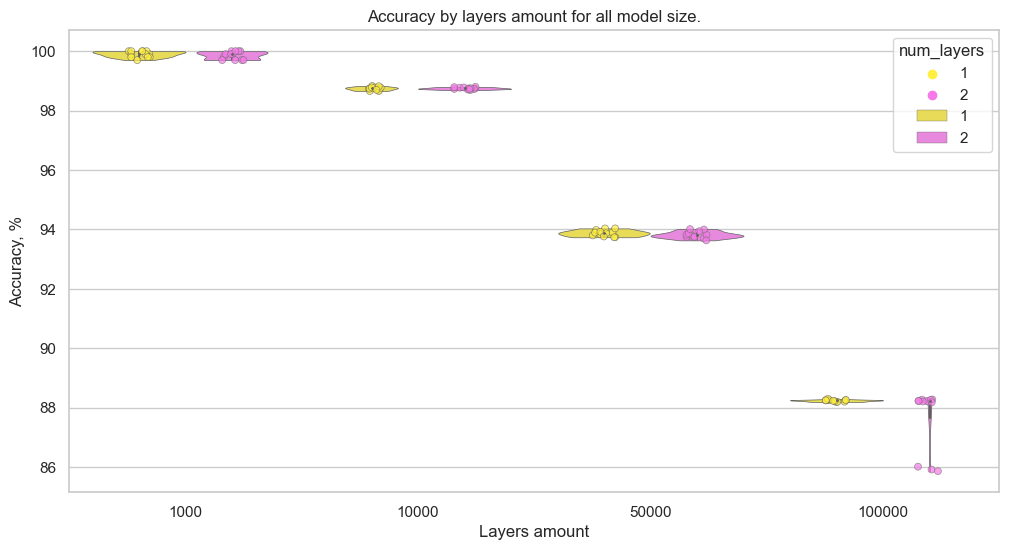

Separated


/home/I6356345/anaconda3/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:18: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
/home/I6356345/anaconda3/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:18: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
/home/I6356345/anaconda3/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:18: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
/home/I6356345/anaconda3/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:18: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
/home/I6356345/anaconda3/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:18: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.


<Figure size 1400x400 with 0 Axes>

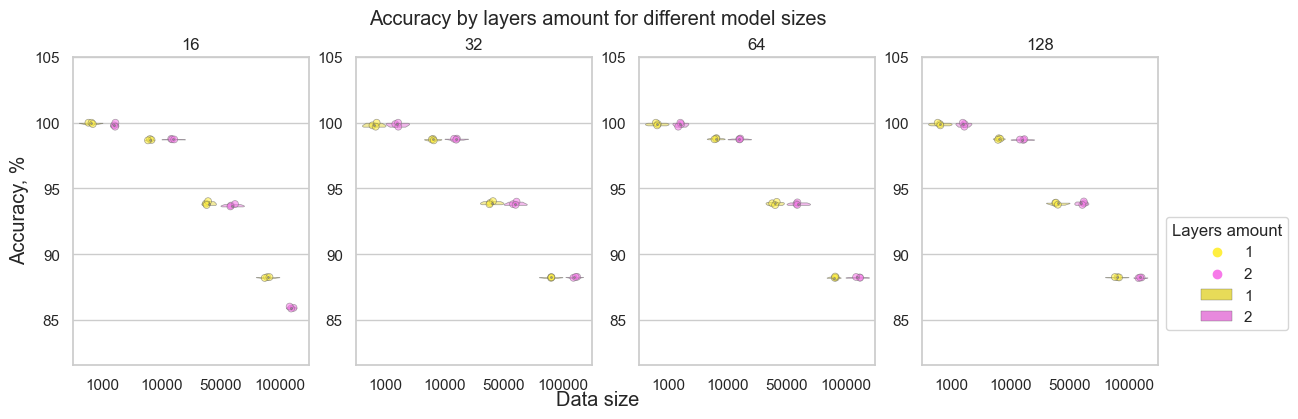

All together


/home/I6356345/anaconda3/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:18: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.


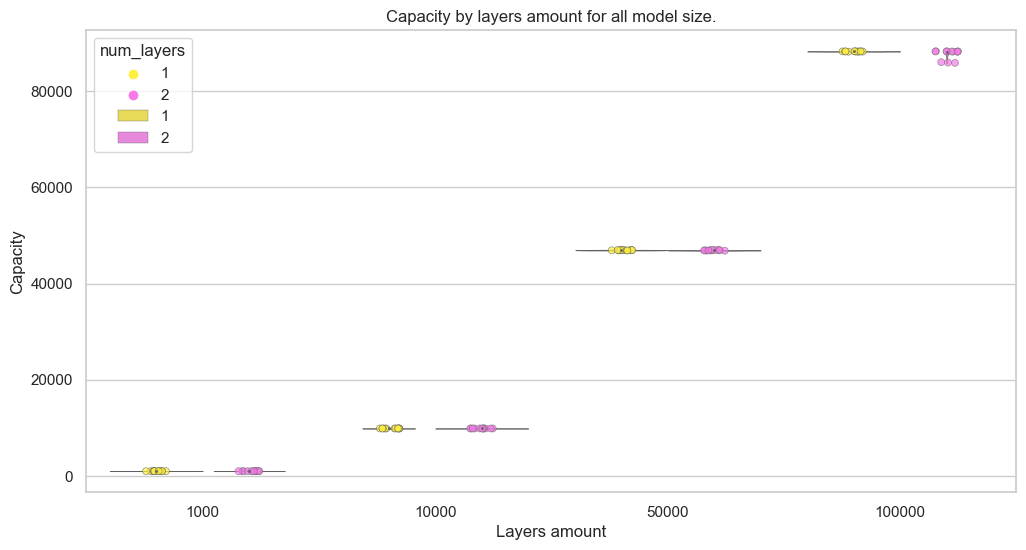

Separated


/home/I6356345/anaconda3/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:18: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
/home/I6356345/anaconda3/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:18: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
/home/I6356345/anaconda3/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:18: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
/home/I6356345/anaconda3/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:18: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
/home/I6356345/anaconda3/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:18: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.


<Figure size 1400x400 with 0 Axes>

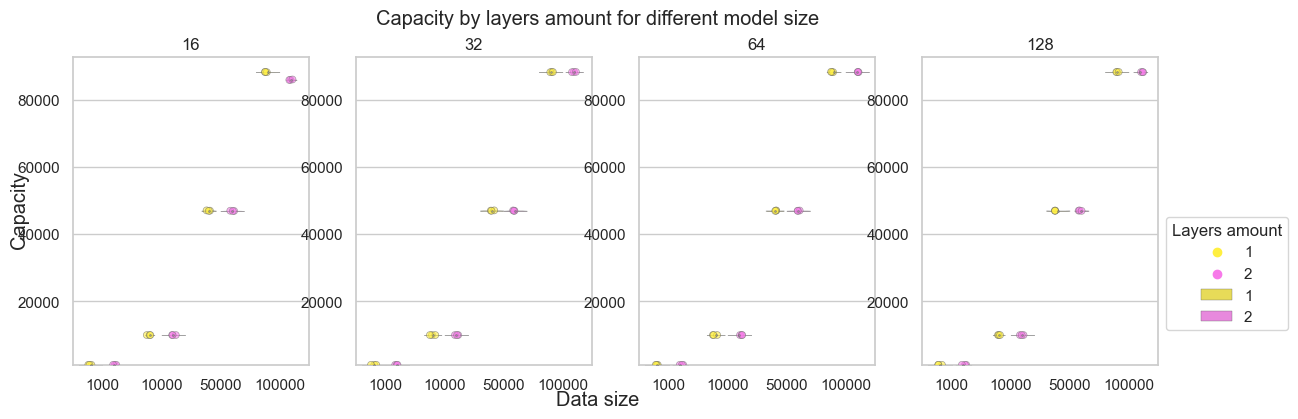

In [27]:
labels = [
    (
        "accuracy",
        "Accuracy, %",
        "Accuracy by layers amount for all model size.",
        "Accuracy by layers amount for different model sizes",
        (0, 100)
    ),
    (
        "capacity",
        "Capacity",
        "Capacity by layers amount for all model size.",
        "Capacity by layers amount for different model size",
        (0, 100000)
    ),
]


for y, ylabel, title, title_separated, val_range in labels:
    print("All together")
    sns.set(style="whitegrid")
    plt.figure(figsize=(12, 6))
    draw_violins(
        data_viol,
        x="n_rows",
        y=y,
        xlabel="Layers amount",
        ylabel=ylabel,
        title=title,
        hue="num_layers",
    )
    plt.show()
    # ==================================================
    print("Separated")
    sns.set(rc={"figure.figsize": (14, 4)})
    sns.set_theme(style="whitegrid")
    # get legend
    ax = draw_violins(
        data_viol,
        x="n_rows",
        y=y,
        xlabel="Layers amount",
        ylabel=ylabel,
        title=title_separated,
        hue="num_layers",
        return_ax=True,
    )
    handles, labels = ax.get_legend_handles_labels()
    plt.clf()
    # draw
    fig, axs = plt.subplots(nrows=1, ncols=4)
    for i, act_f in enumerate(data_viol.d_model.unique()):
        row = i // 4
        col = i % 4
        cur_data = data_viol[data_viol.d_model == act_f]
        ax = draw_violins(
            cur_data,
            x="n_rows",
            y=y,
            xlabel="Layers amount",
            ylabel=ylabel,
            title=f"`{act_f}`.",
            hue="num_layers",
            return_ax=True,
            ax=axs[col],
        )
        plt.setp(ax.collections, alpha=0.58)
        ax.legend_.remove()
        ax.set(ylabel="", xlabel="", title=act_f)
        ax.set(ylim=(data_viol[y].min()*0.95, data_viol[y].max()*1.05))
        ax
    fig.supylabel(ylabel, y=0.5, x=0.08)
    fig.supxlabel("Data size", y=0, x=0.5)
    fig.suptitle(title_separated, y=1, x=0.5)
    fig.legend(
        handles,
        labels,
        loc="upper left",
        bbox_to_anchor=(0.9, 0.5),
        title="Layers amount",
    )
    plt.subplots_adjust(
        left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.2
    )
    plt.show()